### ESMA 4016
### Decision Trees
#### Edgar Acuna

In [1]:
import numpy as np
import pandas as pd
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics

### I. Decision Trees aplicado a los datos de aprobar un curso usando como precictoras E1 y E2

In [2]:
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
E1      32 non-null int64
E2      32 non-null int64
PF      32 non-null int64
Nota    32 non-null object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [3]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
print y2.head()

0    1
1    1
2    1
3    1
4    1
Name: pass, dtype: int64


In [4]:
#Construyendo el arbol con 2 niveles de profundidad y graficandola usando graphviz
modeltree = tree.DecisionTreeClassifier(max_depth=2)
modeltree = modeltree.fit(X1,y1)

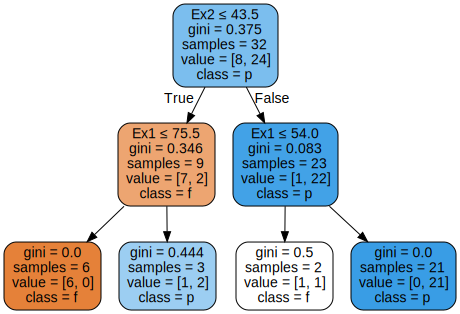

In [5]:
names=["Ex1","Ex2"]
clases=['f','p']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names,  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [6]:
#Construyendo el arbol con 2 niveles de profundidad y la Entropia come medida de impureza
modeltree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
modeltree = modeltree.fit(X1,y1)

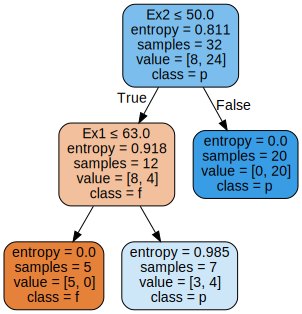

In [7]:
names=["Ex1","Ex2"]
clases=['f','p']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names,  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### II. Aplicando Decision Trees a los datos de Prestamo

In [8]:
df = pd.read_csv("https://academic.uprm.edu/eacuna/datosarbol.csv")
y=df['Prestamo']
data=df.iloc[:,0:6]
#Codificando 0-1 las Variables Sexo y CasPropia
lb_make = LabelEncoder()
data["Sexo"] = lb_make.fit_transform(data["Sexo"])
data['CasPropia']=lb_make.fit_transform(data["CasPropia"])
data1=data['StatustMarital']
#Aplicando OneHot encoding a la predictora StatustMarital
data2=pd.get_dummies(data1,prefix=['StatustMarital'])
data3=pd.concat([data.iloc[:,0:5],data2],axis=1)
y2=lb_make.fit_transform(y)
#Haciendo la regresion logistica ya calculando su precision
#Construyendo el arbol con 3 niveles de profundidad y graficandola usando graphviz
#Despues de instalar Grpahviz dar el comando dot -Tpng tree.dot -o tree.png
modeltree = tree.DecisionTreeClassifier(max_depth=2)
modeltree = modeltree.fit(data3,y2)
print data3

    Sexo  Familia  CasPropia  AnosEmpleo  Sueldo  ['StatustMarital']_Casado  \
0      0        3          0          17    2500                          0   
1      1        5          1          10    3000                          1   
2      1        4          0          15    2000                          0   
3      0        3          1          16    2800                          0   
4      0        6          1          11    4000                          0   
5      1        4          1          26    3200                          0   
6      1        2          1          14    1800                          0   
7      0        5          1          10    3750                          1   
8      0        6          0          18    2970                          0   
9      0        4          1          12    3350                          0   
10     0        1          0          23    1950                          0   
11     1        2          1          25    2740    

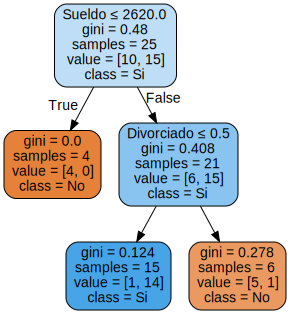

In [9]:
names=['Sexo',  'Familia',  'CasPropia',  'AnosEmpleo',  'Sueldo',  'Casado','Divorciado',"Soltero","Viudo"]
clases=['No','Si']
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                         feature_names=names,  
                         class_names=clases,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Notar que el split con la variable categoria no es entendible